
# Regression of data is a form of function minimization

# Optimalizáción alapuló regressziós feladatok 



Find  parameters of a model that best reproduces some known data by minimisation of sum of the errors between the predicted and real values.


A regressziós feladat általánosan megfogalmazva adott modell paramétereinek meghatározását jelenti annak érdekében, hogy a modell álltal becsült értékek a lehető legpontosabban írják le a modellezett rendszer viselkedését. 



We often want to fit an equation to data. As an  example will use this equation:

Nagyon gyakran előforduló feladat, hogy egy összefüggés paramétereit adatok alapján kell meghatározni. 

A továbbiakban e feladat megoldását a következő példán keresztül vizsgáljuk:

$E = E_0 + \frac{B_0 V}{B_0'}\left(\frac{(V_0 / V)^{B_0'}}{B_0' - 1} + 1 \right) - \frac{V_0 B_0}{B_0' - 1}$

from [https://journals.aps.org/prb/pdf/10.1103/PhysRevB.28.5480](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.28.5480). 

In this model there are four parameters:

$E_0$: energy at the minimim

$B_0$: bulk modulus

$B_0'$: first derivative of the bulk modulus

$V_0$:volume at the energy minimum

That means, find the set of parameters that minimize the sum of the errors between the model and data.

First we need a function that will use the parameters and return the energy for a given volume.



Text(0, 0.5, 'E')

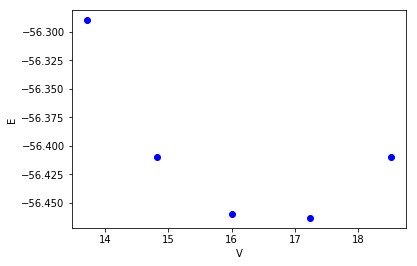

In [1]:
# Define and plot the data / az adatok definiálása és ábrázolása 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([13.71, 14.82, 16.0, 17.23, 18.52])
y = np.array([-56.29, -56.41, -56.46, -56.463,-56.41])

plt.plot(x, y, 'bo')
plt.xlabel('V')
plt.ylabel('E')

In [2]:
# The first step is to define a function that defines the model 
# Az első lépés a modellt leíró függvény definiálása
def f(parameters, x):
    'From PRB 28,5480 (1983)'
    E0, B0, BP, V0 = parameters
    E = E0 + B0 * x / BP * \
        (((V0 / x)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.)

    #E=E0+B0*x+BP*x**2+
    return E

In [3]:
#Next, we need a function that computes the summed squared errors for a set of parameters.
#A következő lépés a hibafüggvény definiálása 
def objective(pars):
    err = y - f(pars, x)
    return np.sum(err**2)  # we return the summed squared error directly

In [4]:
# Let's find the optimum / Ha mindez megvan, akkor optimalizáljunk 
from scipy.optimize import minimize
sol = minimize(objective, x0)
print(sol)


NameError: name 'x0' is not defined

In [ ]:
# Plot the esimates of the model with the  optimal parameters
# Ábrázoljuk a modell által becsült értékeket

plt.plot(x, y, 'bo', label='Data')
x_range = np.linspace(min(x), max(x),10)
plt.plot(x_range, f(sol.x, x_range), label='fit')
plt.legend()
plt.xlabel('V')
plt.ylabel('E')

In [ ]:
sol.x

### Parameter sensitivity analyis 

### Paraméterérzékenység elemzés 

Parameter sensitivity analysis can be used to show that we are near to the real minima and study what is the effect of the parameters to the optima 

A paraméter érzékenységvizsgálat célja hogy elemezzük, milyen hatással van a becsült paraméter módosítása a költségfüggvényre és a modell által  számított értékekre. 


In [ ]:
E0_range = np.linspace(0.9 * sol.x[0], 1.1 * sol.x[0]) # range of the first parameter /az első paraméter környezete 

preds = [f([e0, sol.x[1], sol.x[2], sol.x[3]],x) for e0 in E0_range]  # predictions ... 

errs = [objective([e0, sol.x[1], sol.x[2], sol.x[3]]) for e0 in E0_range]  # Summed squared error as function of E0

plt.subplot(211)
plt.plot(E0_range, preds)
plt.xlabel('E0')
plt.ylabel('E')
plt.subplot(212)
plt.plot(E0_range, errs)
plt.axvline(sol.x[0], c='k', ls='--')
plt.xlabel('E0')
plt.ylabel('summed squared error')


# Parameter confidence intervals

# Paraméter konfidencia intervallumok



The aim of confidence analysis is to determine the uncertainty of the parameters. 
A konfidenciavizsgálat célja a paraméterbizonytalanság meghatározása. 




## Condidence of a point estimate / pontbecslés konfidenciája 

Firstly, let's consider the uncertainty of the  *mean*  of samlpes taken from a fixed number of data points.
Elsőkénmt tekitnsük azt a problémát, hogy egy sokaság átlagát milyen pontossággal tudjuk meghatározni. 

Let's say we have made 10 measurements that have an average of 3.1, and a standard deviation of 0.1. 
In what interval is the avarage situated with 95%  probability?

Ha 10 mérésünk van melynek átlaga 3.1 és a mérések szórása 0.1, 
akkor mekkora tartományban található az átlag 95%-os bizonyossággal? 

Lehet-e 3 az átlag? 




In [ ]:
from scipy.stats.distributions import t

n = 10  # number of measurements /Mérési pontok száma 
dof = n - 1  # degrees of freedom  - for one property, the mean /Szabadsági fok (az átlag n-1)
avg_x = 3  # average measurement - minták átaga 
std_x = 0.1  # standard deviation of measurements - minták szórása 

# Find 95% prediction interval for next measurement !!! FONTOS: mekkora valoszinuseggel lesz kint a becslés 
alpha = 1.0 - 0.95  # = 0.05

pred_interval = t.ppf(1 - alpha / 2.0, dof) * std_x / np.sqrt(n) #STD OF THE AVARAGE ... 
print(pred_interval)
plus_side = avg_x + pred_interval
minus_side = avg_x - pred_interval

print(f'The avarage is in the intervall of {minus_side:1.3f} and {plus_side:1.3f}')

## Becsült paraméterek konfidenciája - Confidence of estimated parameters


Given the data below, fit the following curve:

$y(x) = \frac{a x}{b + x}$ to it.

That means, estimate the values of $a, b$ that best fit the data.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

plt.plot(x, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')


In [ ]:
# this is the function we want to fit to our data
def func(x, a, b):
    return a * x / (b + x)

initial_guess = [3, 2]
pars, pcov = curve_fit(func, x, y, p0=initial_guess)

print(pars, pcov)

plt.plot(x, y, 'bo')
xfit = np.linspace(0, 0.5)
plt.plot(xfit, func(xfit, *pars))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'fit'])

 the standard deviation of each parameter is defined by:

In [ ]:
np.sqrt(np.diag(pcov))

We can use these to estimate confidence intervals on the two parameters.

In [ ]:
from scipy.stats.distributions import t

alpha = 0.005  # 95% confidence interval = 100*(1-alpha)

n = len(y)    # number of data points
p = len(pars)  # number of parameters

dof = max(0, n - p)  # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0 - alpha / 2., dof)

for i, p, var in zip(range(n), pars, np.diag(pcov)):
    sigma = var**0.5
    print(f'p{i}: {p:1.2f} [{p - sigma * tval:1.3f}  {p + sigma * tval:1.3f}]')

The interpretation of this is that we do not know exactly what the parameters are, but we can be 95% confident that they fall in these ranges. These ranges do not include zero, so that is an indication that the parameters are significant.

## Estimation uncertainty based on the Hessian  
## A bizonytalanság becslése a Hessian alapján



In [ ]:
# Let's consider this simple linear regression problem 
# Tekintsük a következő egyszerű lin. reg. feladatot

import numpy as np
from scipy.optimize import curve_fit

x = np.array([0.,    2.5,   5.,    7.5,  10. ])
y = np.array([1.14,    1.91,  2.48,  2.2,  4.0])

def model(x, m, b):
    return m * x + b

p, pcov = curve_fit(model, x, y, [0.2, 0.1])
print(p)
pcov

In theory, the covariance matrix and the inverse hessian are related to each other with $cov = 0.5 * H^{-1}$.


In [ ]:
from scipy.optimize import minimize

def model(pars, x):
    x = np.array(x)
    m, b = pars
    return m * x + b

def objective(pars):
    errs = y - model(pars, x)
    return np.sum(errs**2)

sol = minimize(objective, [0.2, 1], tol=1e-9) # Set tol to ensure high precision 
print(sol.x)
print(0.5 * sol.hess_inv)